In [1]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [2]:
# Fetch the service account key JSON file contents
cred = credentials.Certificate("../credentials.json")

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://ab-test-37c5e-default-rtdb.firebaseio.com/'
})

# As an admin, the app has access to read and write all data, regardless of Security Rules
ref = db.reference('iteration 3')

In [3]:
# Define the groups
groups = ["control", "test", "unused"]

# Initialize variables to store total time and count
total_time = 0
total_count = 0

# Loop through all groups
for group_name in groups:
    group_ref = ref.child(group_name)  # Get the reference to the group
    group_data = group_ref.get()  # Get the data for the group

    # Add the presence time and count for the current group to the total
    total_time += sum(user_data["presence_time"] for user_data in group_data.values())
    total_count += len(group_data)

# Calculate the collective average presence time
average_time = total_time / total_count

print(f"The collective average presence time for all groups is {average_time} seconds in our last iteration.")



The collective average presence time for all groups is 480.1841925534335 seconds in our last iteration.


In [4]:
def calculate_average_time(iteration):
    ref = db.reference(iteration)      #set our reference to current iteration being examined
    groups = ["control", "test"]       #we will omit "unused" to keep graph consistent

    for group_name in groups:
        group_ref = ref.child(group_name)  # Get the reference to the group
        group_data = group_ref.get()  # Get the data for the group

        # Calculate the average presence time
        total_time = sum(user_data["presence_time"] for user_data in group_data.values())
        average_time = total_time / len(group_data)

    return average_time


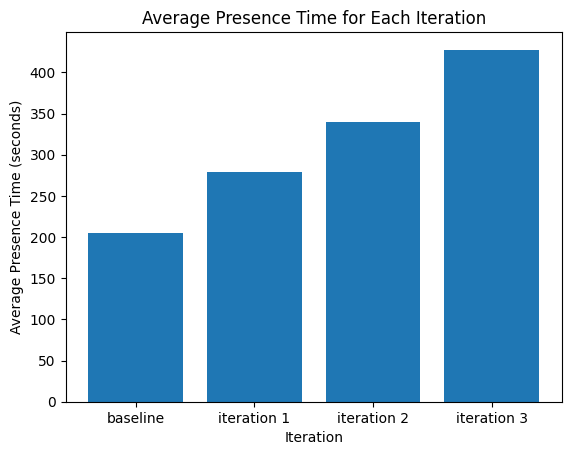

In [5]:
import matplotlib.pyplot as plt

# Define the iterations
iterations = ["baseline", "iteration 1", "iteration 2", "iteration 3"]

# Calculate the average presence time for each iteration
averages = [calculate_average_time(iteration) for iteration in iterations]

# Create a bar chart
plt.bar(iterations, averages)

# Add title and labels
plt.title("Average Presence Time for Each Iteration")
plt.xlabel("Iteration")
plt.ylabel("Average Presence Time (seconds)")

# Display the chart
plt.show()


In [10]:
def calculate_average_time_group(group, iteration):
    ref = db.reference(iteration)  # Set our reference to current iteration being examined

    group_ref = ref.child(group)  # Get the reference to the group
    group_data = group_ref.get()  # Get the data for the group

    # Check if group_data is None
    if group_data is None:
        print(f"No data found for group {group} in iteration {iteration}")
        return 0

    # Calculate the average presence time
    total_time = sum(user_data["presence_time"] for user_data in group_data.values())
    average_time = total_time / len(group_data)

    return average_time


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

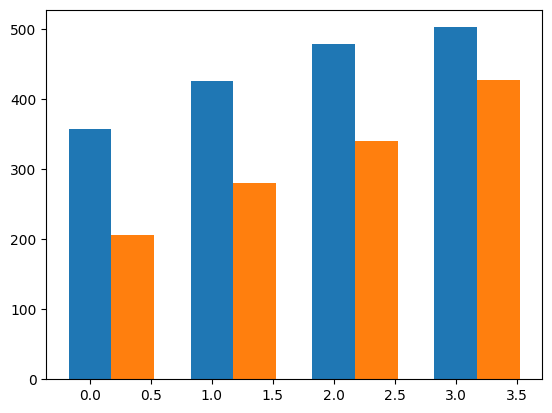

In [11]:
import numpy as np

# Assume you have a function `calculate_average_time(group, iteration)` that returns the average time for a given group and iteration
# Calculate the average presence time for each group and iteration
averages = [[calculate_average_time_group(group, iteration) for iteration in iterations] for group in groups]

# Create a grouped bar chart
bar_width = 0.35
index = np.arange(len(iterations))

for i, group in enumerate(groups):
    plt.bar(index + i * bar_width, averages[i], bar_width, label=group)

# Add title and labels
plt.title("Average Presence Time for Each Iteration")
plt.xlabel("Iteration")
plt.ylabel("Average Presence Time (seconds)")
plt.xticks(index + bar_width / 2, iterations)  # Position x-axis labels
plt.legend()  # Show group labels

# Display the chart
plt.show()
